In [4]:
from typing import List
import math
import numpy as np
from numpy.typing import ArrayLike
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = pd.read_csv('./hw3Data/D2z.txt', sep='\s+', names=['x1', 'x2', 'y'])
df

,x1,x2,y
0,-0.333338,-0.087171,0
1,-1.531730,0.358194,1
2,1.549590,-0.364050,0
3,-1.349910,0.252063,1
4,1.283850,-0.531146,0
...,...,...,...
195,-0.697750,1.098280,1
196,1.161160,-0.733751,0
197,-1.288480,0.443773,1
198,-1.384200,0.526523,1


In [18]:
def distance_Euclidean(X1: pd.Series, X2: pd.Series) -> float:
    d = 0
    for i in range(0, len(X1)):
        d += (X1[i] - X2[i])**2
    d = math.sqrt(d)
    return d

def kNN(train: pd.DataFrame, sample: pd.Series, k: int) -> int:
    # compute distances
    distances = []
    for i, row in train.iterrows():
        distance = distance_Euclidean(sample, row[:-1])
        distances.append((i, distance))
    distances.sort(key=lambda x: x[1])
    # tally the votes for the k-nearest
    votes = []
    for d in distances[:k]:
        vote = train.iloc[d[0]]['y']
        votes.append(vote)
    # determine the prediction
    majority = pd.Series(votes).mode()
    if len(majority) > 1:
        return votes[0]
    else:
        return majority[0]

In [16]:
data_range = np.arange(-2, 2.1, 0.1)
df1 = pd.DataFrame({'x': data_range})
df2 = pd.DataFrame({'y': data_range})
test_df = df1.merge(df2, how='cross')
test_df

,x,y
0,-2.0,-2.0
1,-2.0,-1.9
2,-2.0,-1.8
3,-2.0,-1.7
4,-2.0,-1.6
...,...,...
1676,2.0,1.6
1677,2.0,1.7
1678,2.0,1.8
1679,2.0,1.9


In [22]:
predictions = []
for i, row in test_df.iterrows():
    predictions.append(kNN(df, row, 1))
test_df['predicted_class'] = predictions

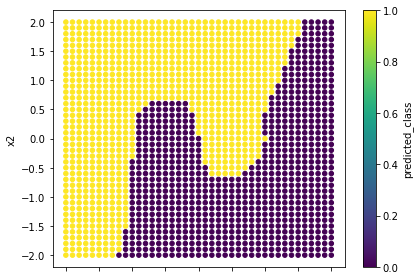

In [24]:
ax = test_df.plot.scatter(x='x', y='y', c='predicted_class', colormap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.tight_layout()
plt.show()